In [86]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [87]:
data_train_path='./init_rdc_data/rdc-catalog-train.tsv'

In [88]:
data_test_path='./init_rdc_data/rdc-catalog-test.tsv'

In [89]:
%matplotlib inline

In [90]:
data_train = pd.read_csv(data_train_path,sep='\t',header=-1)

In [91]:
data_train.head(2)

,0,1
0,Replacement Viewsonic VG710 LCD Monitor 48Watt...,3292>114>1231
1,HP COMPAQ Pavilion DV6-1410EZ 4400mAh 48Wh 6 C...,3292>1370>4767>3975>1420


In [92]:
data_test = pd.read_csv(data_test_path,sep='\t',header=-1)

In [93]:
data_train.head(2)

,0,1
0,Replacement Viewsonic VG710 LCD Monitor 48Watt...,3292>114>1231
1,HP COMPAQ Pavilion DV6-1410EZ 4400mAh 48Wh 6 C...,3292>1370>4767>3975>1420


In [94]:
data_train.shape

(800000, 2)

In [95]:
data_test.shape

(200000, 1)

In [96]:
data_train['lenth'] = data_train.iloc[:,0].apply(lambda s: len(s.split(' ')))

In [97]:
data_test['lenth'] = data_train.iloc[:,0].apply(lambda s : len(s.split(' ')))

In [98]:
data_train['label_lenth'] = data_train.iloc[:,1].apply(lambda s: len(s.split('>')))

In [99]:
data_train.head(2)

,0,1,lenth,label_lenth
0,Replacement Viewsonic VG710 LCD Monitor 48Watt...,3292>114>1231,10,3
1,HP COMPAQ Pavilion DV6-1410EZ 4400mAh 48Wh 6 C...,3292>1370>4767>3975>1420,13,5


In [100]:
data_test.head(2)

,0,lenth
0,Sterling Silver Dangle Ball Earrings w/ Brilli...,10
1,ALTERNATOR FREIGHTLINER FL FLC 112 120 FLD 112...,13


In [101]:
data_train['label_list']= data_train.iloc[:,1].apply(lambda s : s.split('>'))

In [102]:
def return_label(x,k):
    try:
        return x[k]
    except:
        return np.nan

In [103]:
for i in range(8):
    data_train['label_%d'%i]= data_train['label_list'].apply(lambda s :return_label(s,i))

In [104]:
data_train.head(2)

,0,1,lenth,label_lenth,label_list,label_0,label_1,label_2,label_3,label_4,label_5,label_6,label_7
0,Replacement Viewsonic VG710 LCD Monitor 48Watt...,3292>114>1231,10,3,"[3292, 114, 1231]",3292,114,1231,NaN,NaN,NaN,NaN,NaN
1,HP COMPAQ Pavilion DV6-1410EZ 4400mAh 48Wh 6 C...,3292>1370>4767>3975>1420,13,5,"[3292, 1370, 4767, 3975, 1420]",3292,1370,4767,3975,1420,NaN,NaN,NaN


In [1]:
plt.figure(figsize=(16,8))

plt.subplot(2,3,1)
plt.bar(left = [0,1],height =[800000,200000],width=0.5)
plt.xticks((0,1),('train','test'))
plt.xlabel('(a)Histogram of data volume between training set and test set ')
plt.ylabel('Quantity of titles')

plt.subplot(2,3,2)
sns.distplot(data_train['lenth'])
plt.xlabel('(b)Word number distribution of title in training dataset')
plt.ylabel('Probability')

plt.subplot(2,3,3)
sns.distplot(data_test['lenth'])
plt.xlabel('(c)Word number distribution of title in test dataset')
plt.ylabel('Probability')

plt.subplot(2,3,4)
data_train.iloc[:,1].value_counts().plot()
plt.xlabel('(d)Distribution of different product categorys')
plt.ylabel('Quantity of titles')

plt.subplot(2,3,5)
sns.countplot(data_train['label_lenth'],color='lightblue')
plt.xlabel('(e)Distribution of product quantity in different levels')
plt.ylabel('Quantity of titles')


plt.subplot(2,3,6)
plt.bar(left = range(8),height =stastic_list,width=0.5)
plt.xticks(range(8),['levels%d'%i for i in range(1,8+1)],rotation=15)
plt.xlabel('(f)The number of subordinate categories of different commodity levels')
plt.ylabel('Quantity of species')


plt.savefig('data_understanding.png')
# plt.xlabel(rotation=10)|

In [ ]:
#end

In [113]:
stastic_list = [len(set(data_train['label_%d'%i].unique())-set([np.nan])) for i in range(8)]

In [114]:
stastic_list

[14, 108, 865, 1573, 752, 232, 148, 3]

In [115]:
# 绘制帕累托图

In [116]:
AAA =data_train.pivot_table(index='label_lenth',aggfunc={'lenth':'count'}).sort_values('lenth',ascending=False).reset_index()

In [117]:
AAA['cumsum']=AAA['lenth'].cumsum()

In [118]:
AAA['rate']=AAA['cumsum']/800000

<BarContainer object of 8 artists>

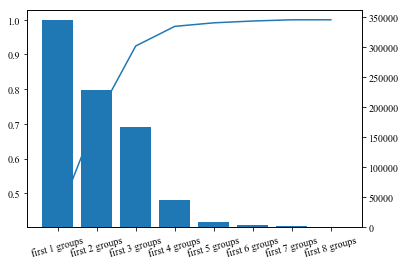

In [119]:
fig, ax1 = plt.subplots() 
plt.xticks(range(8),['first %d groups'%i for i in range(1,9)],rotation=15)
ax2=ax1.twinx()
ax1.plot(AAA['rate'])
ax2.bar(x=range(0,8),height=AAA['lenth'])


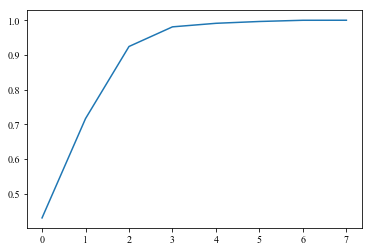

In [120]:
AAA['rate'].plot()

In [2]:
plt.bar(left = range(1,8+1),height=AAA['lenth'])
plt.plot(x=range(1,8+1),y=AAA['rate'])
AAA['rate'].plot()

In [122]:
AAA

,label_lenth,lenth,cumsum,rate
0,4,344472,344472,0.430590
1,3,228888,573360,0.716700
2,5,166165,739525,0.924406
3,6,45253,784778,0.980973
4,1,8172,792950,0.991187
5,7,4197,797147,0.996434
6,2,2792,799939,0.999924
7,8,61,800000,1.000000


In [123]:
plt.rc('font',family='Times New Roman')

In [56]:
?plt.title()

(array([-500.,    0.,  500., 1000., 1500., 2000., 2500., 3000., 3500.]),
 <a list of 9 Text xticklabel objects>)

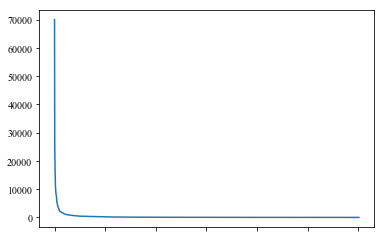

In [124]:
data_train.iloc[:,1].value_counts().plot()
plt.xticks()

<Figure size 1152x1152 with 0 Axes>

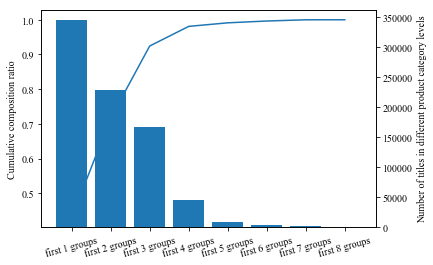

In [125]:
plt.figure(figsize=(16,16))
fig, ax1 = plt.subplots() 
plt.xticks(range(8),['first %d groups'%i for i in range(1,9)],rotation=15)
ax2=ax1.twinx()
ax1.plot(AAA['rate'])
ax1.set_ylabel('Cumulative composition ratio')
ax2.bar(x=range(0,8),height=AAA['lenth'])
ax2.set_ylabel('Number of titles in different product category levels')
plt.savefig('Parato pic.png')